<h1> Diabetes Prediction using Machine Learning</h1>
-------------------------------------------------------------------------------------------------------------------------------------


<h3> The project goal is to predict whether person has diabetes or not using 8 attributes. Given dataset is of only female. There are attributes like;
-
-


</h3>

1.   Number of Preganancies
2.   Glucose Level
3.   Blood Pressure
4.   Skin Thickness
5.   Insuline Level
6.   BMI
7.   Diabetes_Pedigree_Function
8.   Age

<h3> Here I am using Support Vector Machine (SVM) as model to predict that person is diabetic or not.
In outcome column '0' means person is not diabetic and '1' means person is diabetic.
</h3>





In [1]:
# Importing needy libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
#PIMQA diabetes dataset
#only for female
#Loading the Dataset to a pandas dataframe
diabetes_dataset=pd.read_csv('/content/diabetes.csv')

In [3]:
#using this command we can see description of any function. like pd.function_name?
pd.read_csv?
#anathi je te function su kre e khbr pde (guj)

In [4]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


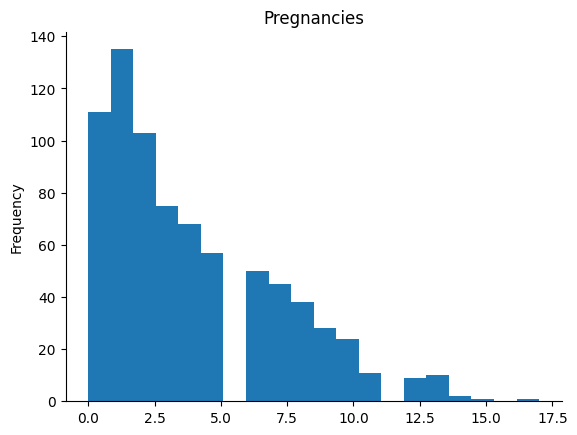

In [ ]:
# @title Pregnancies

from matplotlib import pyplot as plt
diabetes_dataset['Pregnancies'].plot(kind='hist', bins=20, title='Pregnancies')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
#to see the dimensions of our dataset
diabetes_dataset.shape

(768, 9)

-->Here we have 768 data points and 8 attributes. 9th one is output label

In [6]:
# Give Statistical Description column wise
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_dataset['Outcome'].value_counts()
#0 means non diabetic
#1 means diabetic

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
#Based on Outcome column ; we are making 2 groups. one is for diabetic and one for non diabetic. Then we are finding mean of all attributes group wise.
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
# Sepearate Data(input) and Labels(output)
x=diabetes_dataset.drop(columns='Outcome',axis=1)
y=diabetes_dataset['Outcome']

In [10]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [11]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [12]:
# Data Standardization
scaler=StandardScaler()

In [14]:
scaler.fit(x)

StandardScaler()

In [15]:
standardized_data=scaler.transform(x) #(guj) fit ne transform alag alag na bdle jode b use thay using the function "fit_transform"

In [16]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [17]:
x=standardized_data
y=diabetes_dataset['Outcome']

In [18]:
print(x)
print(y)
#now all values come within -1 to 1

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [19]:
# 20% data points are used as Test Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [20]:
print(x.shape,x_train.shape,x_test.shape)
# 614 data points go for training and 154 data points go for testing

(768, 8) (614, 8) (154, 8)


In [22]:
# Train model
# SVC means Suppoort Vector Classifier
classifier=svm.SVC(kernel='linear')
# We are using Linear Model

In [23]:
# Training SVM
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [24]:
# Evaluation of Model
# We are trying to predict on x train and then cross check with y train
x_train_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [35]:
print(training_data_accuracy*100)

78.66449511400651


In [29]:
# Accuracy of Testing Model
x_test_prediction=classifier.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [36]:
print(testing_data_accuracy*100)

77.27272727272727


In [34]:
# If accuracy on training data is more and accuracy on testing data is less then this condition is called "Overfitting"
input_data=(6,148,72,35,0,33.6,0.627,50) # giving 8 attributes

#changing input_data to numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the array as we are prdicting for one instance
# jo reshape na kro to model 768 data expect kre bcz apdu model 768 data points pr train thyu che ne(guj)
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

#have data to standardize kryo che to as it is data ni apay(guj)
#standardize the input data
std_data=scaler.transform(input_data_reshape)
print(std_data)

prediction=classifier.predict(std_data)
print(prediction)

if (prediction[0]==0):
  print('The person is not diabetic')
else:
  print('the person is diabetic')

# 1 avavo joto jawab ne 1 j predict kryu..sachu predict kryu

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]]
[1]
the person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
